In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
file_path = 'positions/2p5_HA_Mar6/2p5_HA_6Mar_e_2p5_HA_4 Image 5.csv'
#file_path = 'positions/2p5_Mar22/23march20242p5_b_2p5_240324_1_100ul Image 2.csv'

In [17]:
df = pd.read_csv(file_path, skiprows=1)
df


,Position X,Position Y,Unit,Category,Collection,Time,TrackID,ID
0,117.084000,6.709320,µm,Spot,Position,1,1000001412,1412
1,94.852402,7.493290,µm,Spot,Position,1,1000001540,1540
2,73.360199,17.183701,µm,Spot,Position,1,1000003364,3364
3,141.479004,30.858101,µm,Spot,Position,1,1000005994,5994
4,165.542007,55.057400,µm,Spot,Position,1,1000010624,10624
...,...,...,...,...,...,...,...,...
3431,83.969200,36.178799,µm,Spot,Position,300,1005137615,6958702
3432,76.416702,51.308300,µm,Spot,Position,300,1005283223,6961543
3433,105.857002,81.168198,µm,Spot,Position,300,1006084282,6967320
3434,85.506699,104.657997,µm,Spot,Position,300,1006542508,6971798


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


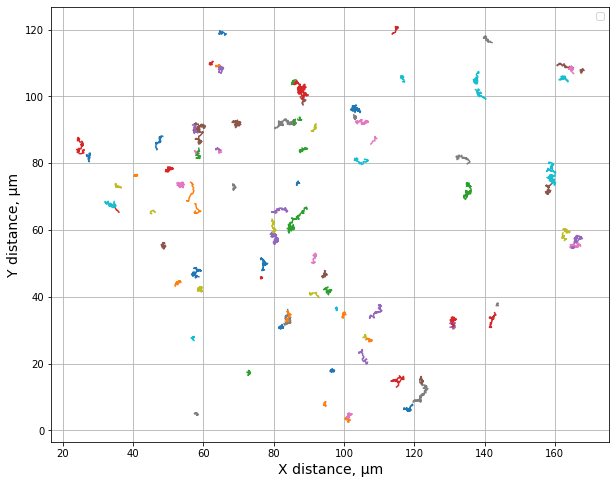

In [18]:
# Sort the dataframe by TrackID and Time
df = df.sort_values(by=['TrackID', 'Time'])

# Plotting the trajectories
plt.figure(figsize=(10, 8))
for track_id, track_data in df.groupby('TrackID'):
    plt.plot(track_data['Position X'], track_data['Position Y'])

#plt.title('Trajectories of Each TrackID')
plt.xlabel('X distance, µm', fontsize=14)
plt.ylabel('Y distance, µm', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('output/trajectories_2p5_HA_Mar6.png', facecolor='white')

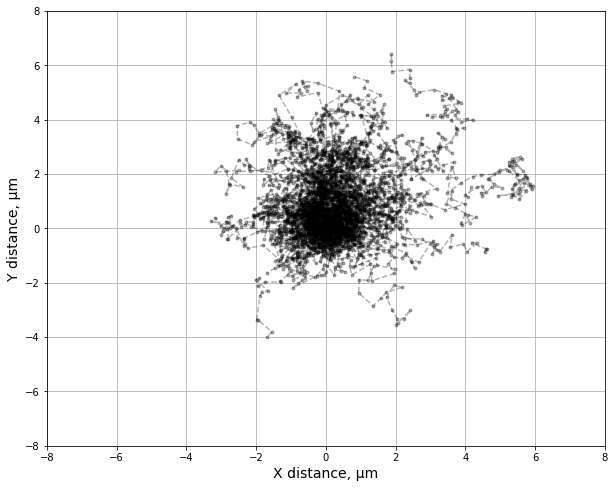

In [ ]:
# Sort the dataframe by TrackID and Time
df = df.sort_values(by=['TrackID', 'Time'])

# Function to translate trajectory to origin
def translate_to_origin(track_data):
    initial_x = track_data['Position X'].iloc[0]
    initial_y = track_data['Position Y'].iloc[0]
    track_data['Position X'] -= initial_x
    track_data['Position Y'] -= initial_y
    return track_data

# Plotting the trajectories without markers
plt.figure(figsize=(10, 8))
for track_id, track_data in df.groupby('TrackID'):
    track_data = translate_to_origin(track_data)
    plt.plot(track_data['Position X'], track_data['Position Y'], alpha = 0.3, color='black', marker='.', linestyle='--')
#plt.title('Trajectories of Each TrackID Starting from Origin')
plt.xlabel('X distance, µm', fontsize=14)
plt.ylabel('Y distance, µm', fontsize=14)
plt.grid(True)
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.savefig('output/trajectories_same_origin_2p5_HA_Mar6.png', facecolor='white')